In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\user\Desktop\Data analysis\Project\Customer_Segmentation\Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Univariate Analysis

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


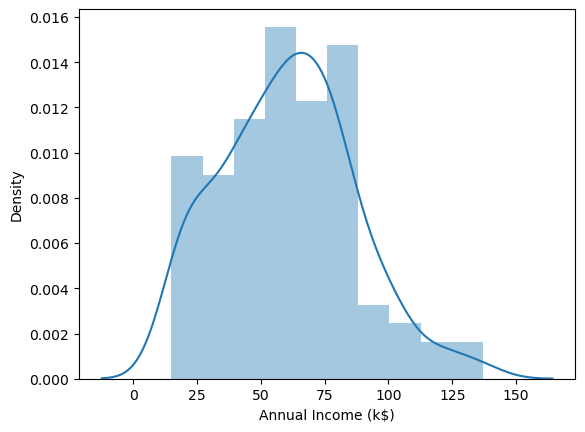

In [6]:
sns.distplot(df['Annual Income (k$)']);

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

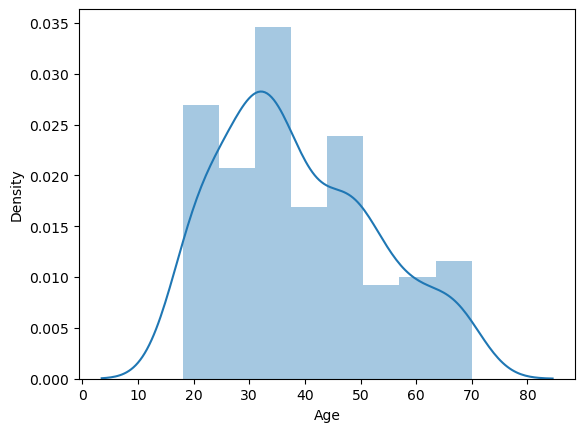

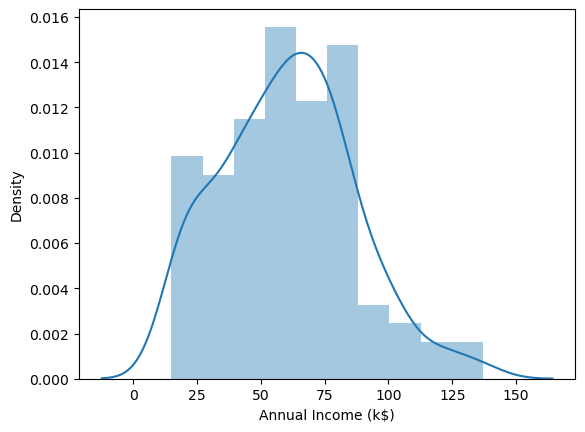

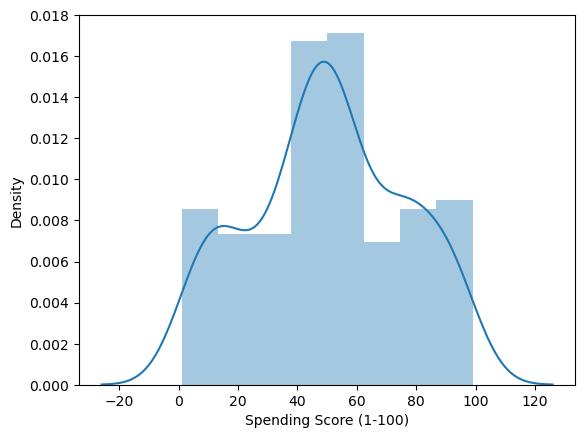

In [8]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

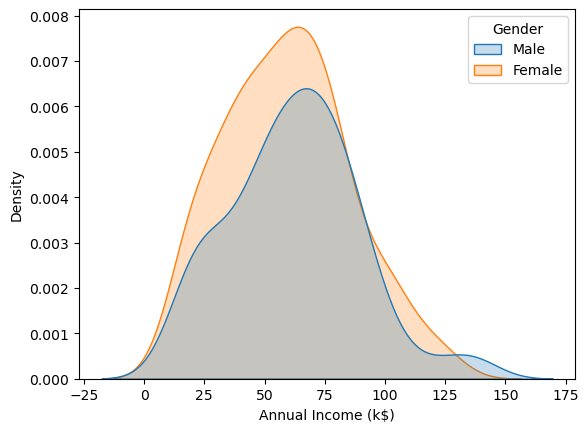

In [9]:
sns.kdeplot(
    data=df,
    x='Annual Income (k$)',
    hue='Gender',
    fill=True
)


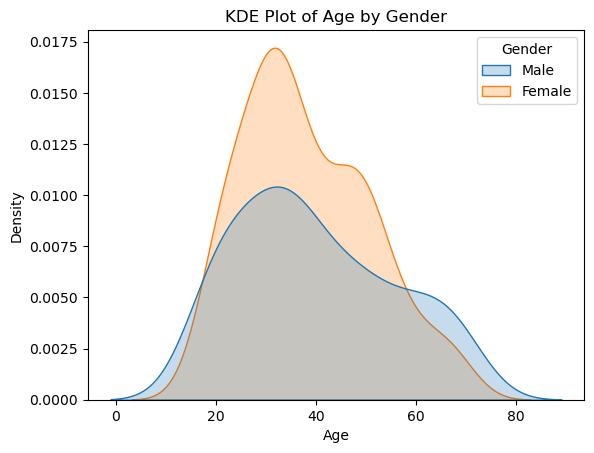

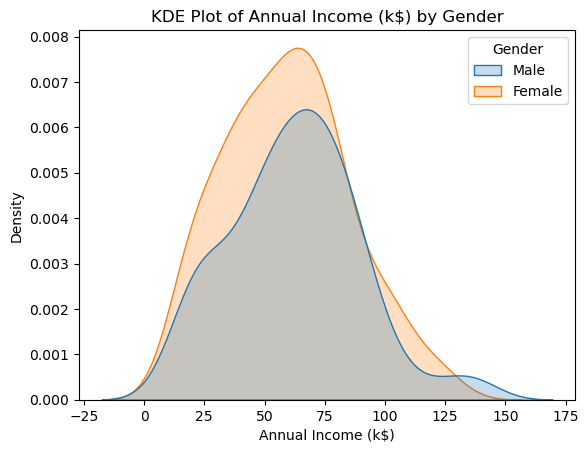

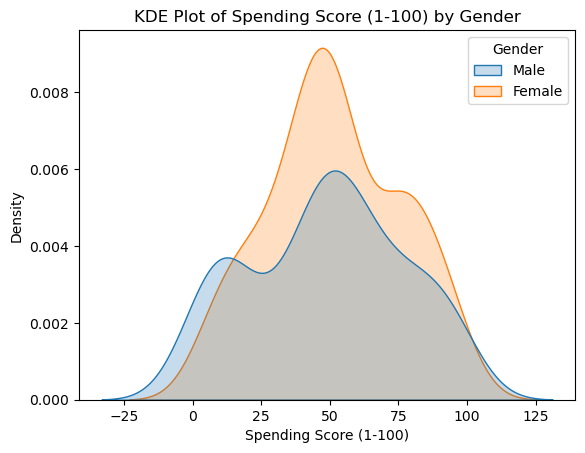

In [10]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col in columns:
    plt.figure()
    sns.kdeplot(
        data=df,
        x=col,
        hue='Gender',
        fill=True
    )
    plt.title(f'KDE Plot of {col} by Gender')


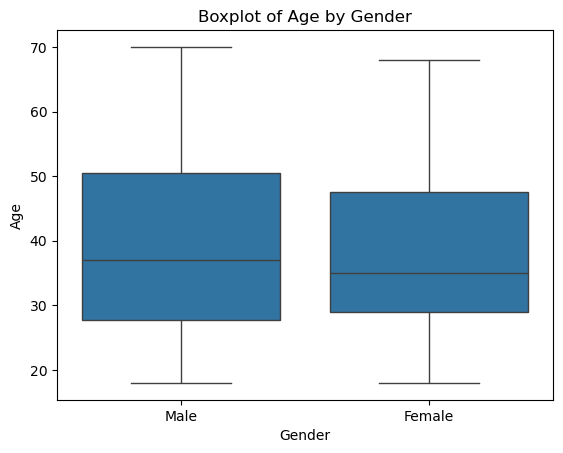

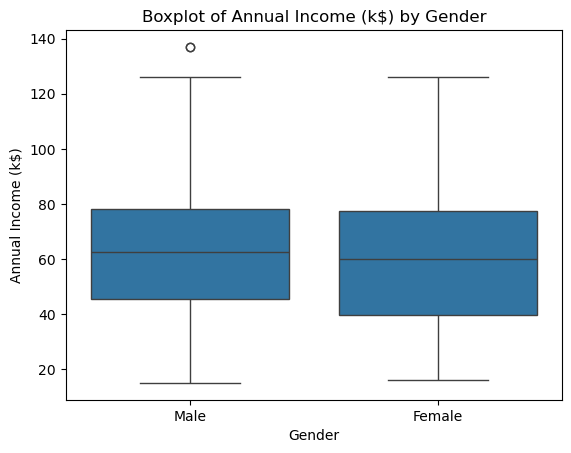

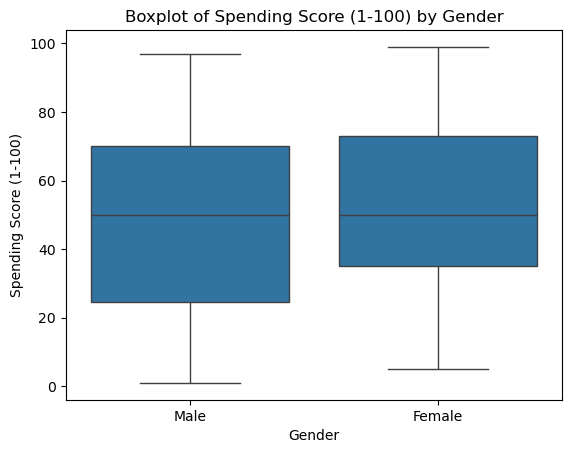

In [11]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col in columns:
    plt.figure()
    sns.boxplot(
        data=df,
        x='Gender',
        y=col
    )
    plt.title(f'Boxplot of {col} by Gender')


In [12]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

#Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

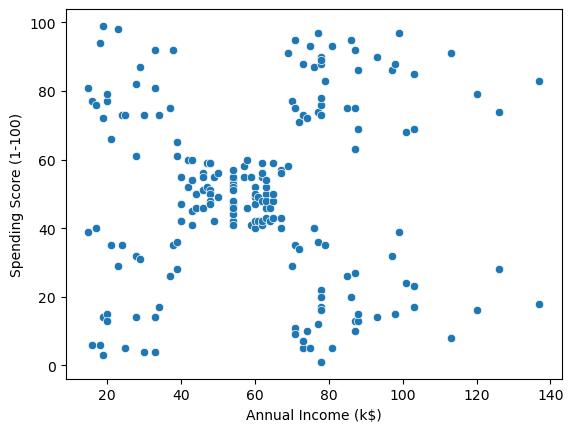

In [13]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

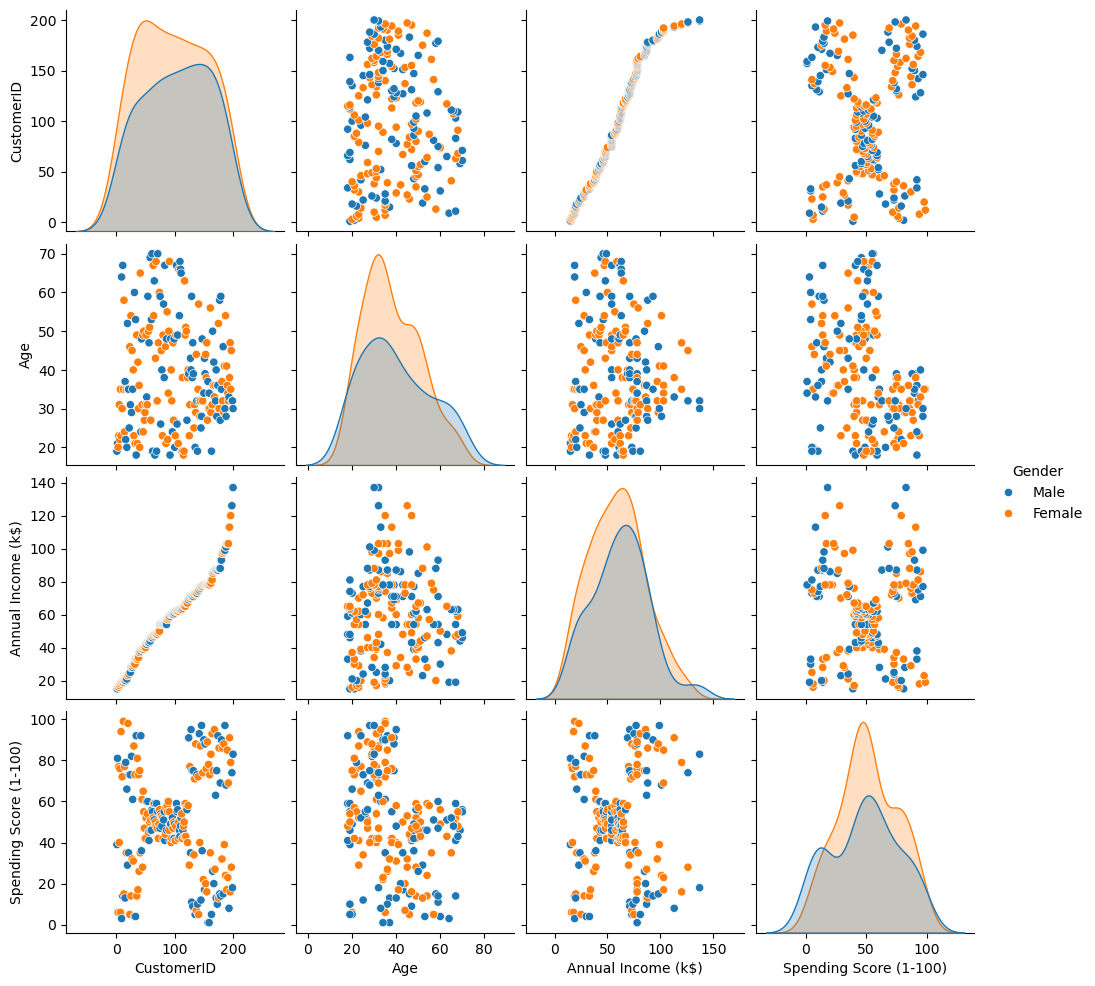

In [14]:
sns.pairplot(df,hue='Gender')

In [15]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [16]:
df['Gender_num'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [17]:
df_corr = df[['Gender_num','Age','Annual Income (k$)','Spending Score (1-100)']].corr()
df_corr


,Gender_num,Age,Annual Income (k$),Spending Score (1-100)
Gender_num,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


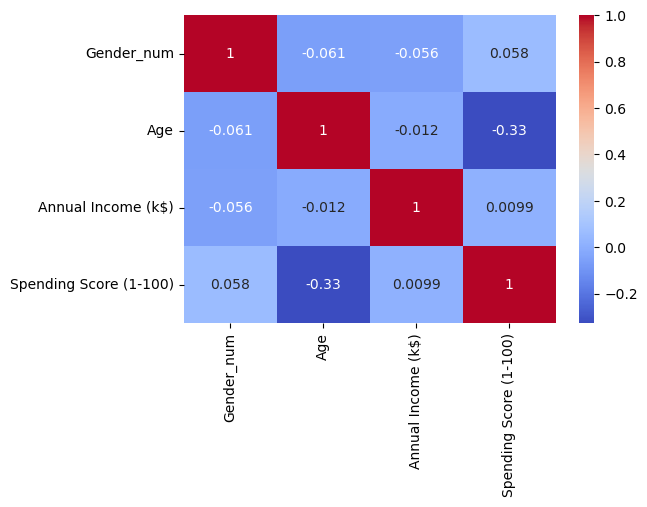

In [18]:
df_corr = df[['Gender_num','Age','Annual Income (k$)','Spending Score (1-100)']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()


In [20]:
clustering1 = KMeans(n_clusters=3)

In [21]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [22]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [23]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_num,Income Cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,1


In [24]:
df['Income Cluster'].value_counts()

Income Cluster
0    92
1    86
2    22
Name: count, dtype: int64

In [25]:
clustering1.inertia_

25341.28587186322

In [28]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)
    

In [29]:
intertia_scores

[137277.28000000003,
 49761.73701298701,
 25640.457784396833,
 15460.42951227089,
 8481.496190476191,
 5081.484660267269,
 3955.2566544566544,
 2871.6615995115994,
 2412.166361416361,
 1980.1523228233757]

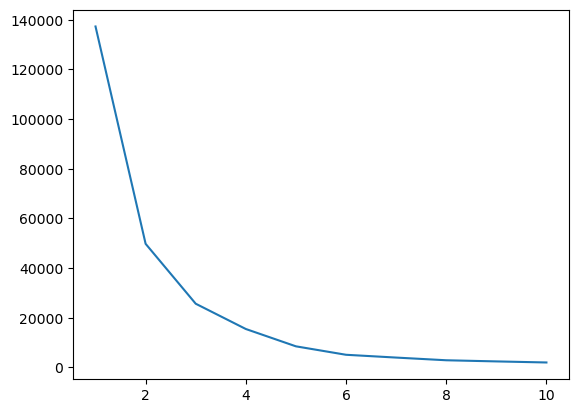

In [30]:
plt.plot(range(1,11),intertia_scores)

In [31]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Gender_num', 'Income Cluster'],
      dtype='object')

In [33]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().reset_index()


,Income Cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,38.065217,71.804348,49.880435
1,1,40.023256,36.348837,50.081395
2,2,37.545455,108.181818,52.000000


#Bivariate Clustering

In [34]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_num,Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,1,2
1,2,Male,21,15,81,0,1,3
2,3,Female,20,16,6,1,1,2
3,4,Female,23,16,77,1,1,3
4,5,Female,31,17,40,1,1,2


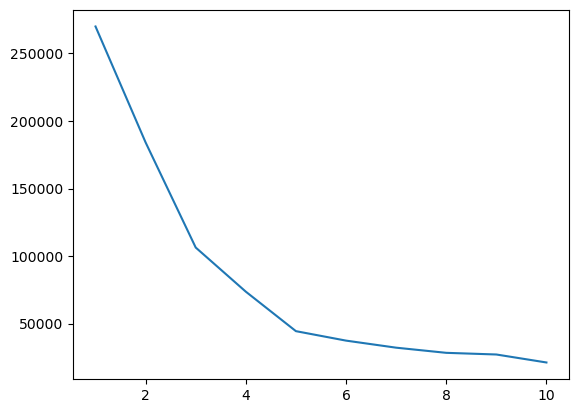

In [35]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [36]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

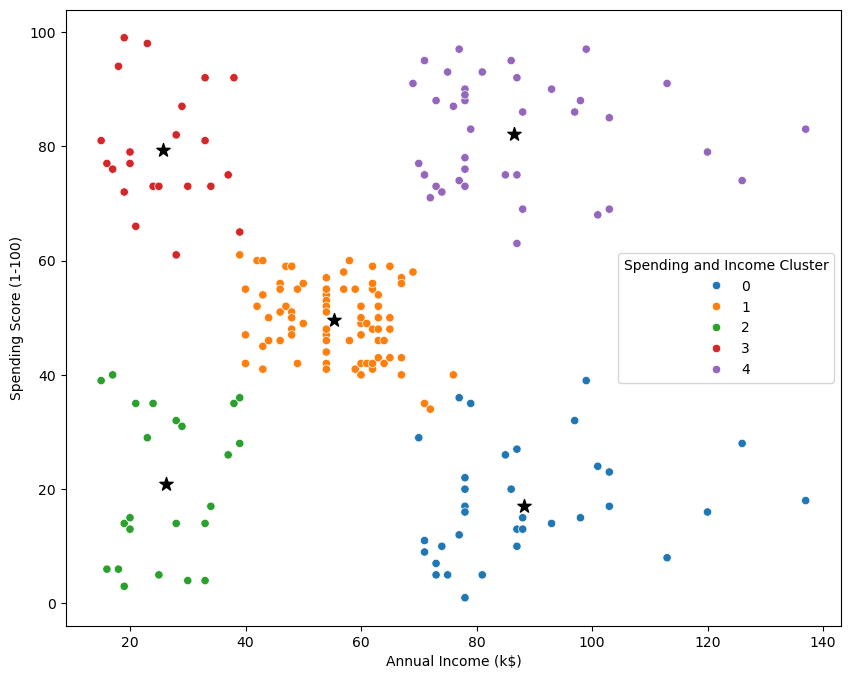

In [37]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [38]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.608696,0.391304
3,0.590909,0.409091
4,0.538462,0.461538


In [40]:
df.groupby('Spending and Income Cluster')[[
    'Age',
    'Annual Income (k$)',
    'Spending Score (1-100)'
]].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,32.692308,86.538462,82.128205


In [41]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler

In [42]:
scale = StandardScaler()

In [43]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_num,Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,1,2
1,2,Male,21,15,81,0,1,3
2,3,Female,20,16,6,1,1,2
3,4,Female,23,16,77,1,1,3
4,5,Female,31,17,40,1,1,2


In [44]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_num,Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,1,2,True
1,2,21,15,81,0,1,3,True
2,3,20,16,6,1,1,2,False
3,4,23,16,77,1,1,3,False
4,5,31,17,40,1,1,2,False


In [45]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_num', 'Income Cluster', 'Spending and Income Cluster',
       'Gender_Male'],
      dtype='object')

In [46]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [47]:
dff = scale.fit_transform(dff)

In [48]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


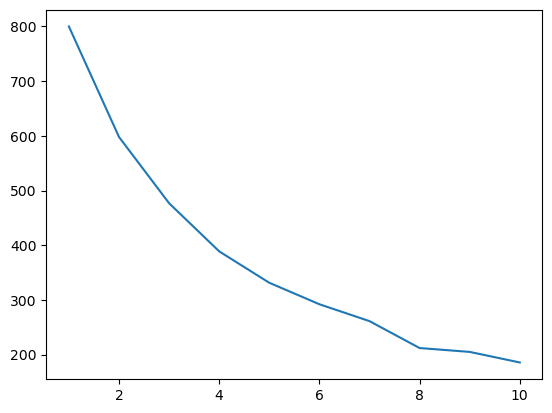

In [49]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [50]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_num,Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,1,2
1,2,Male,21,15,81,0,1,3
2,3,Female,20,16,6,1,1,2
3,4,Female,23,16,77,1,1,3
4,5,Female,31,17,40,1,1,2
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2,4
196,197,Female,45,126,28,1,2,0
197,198,Male,32,126,74,0,2,4
198,199,Male,32,137,18,0,2,0


In [51]:
df.to_csv('Clustering.csv')